In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('/Users/willbarnes/Documents/Rice/Research/EBTEL-2fluid_repo/bin/')
import ebtel2fl_plot as ebp
reload(ebp)

<module 'ebtel2fl_plot' from '/Users/willbarnes/Documents/Rice/Research/EBTEL-2fluid_repo/bin/ebtel2fl_plot.pyc'>

#EBTEL Energy Budget Analysis

In the power-law distributed events that we've been looking at, it seems that our plasma isn't getting hot enough: $T_{\mathrm{max}}$, the temperature at which the emission measure ($\mathrm{EM}$) peaks, is significantly lower than that seen in both simulation and observation, $\log(T_{\mathrm{max}})\sim6.6$.

However, in our runs that use uniform event amplitudes show much better agreement with $T_{\mathrm{max}}$ though for especially long loop-lengths, $T_{\mathrm{max}}$ is too high, . Thus, there seems to be a problem with the energy budget of our power-law distributed nanoflare event amplitudes, $\log(T_{\mathrm{max}})\sim7.0$.

First, let's define a function for choosing from a power-law distribution. 

In [16]:
def pl_dist(a0,a1,alpha,x):
        return ((a1**(alpha+1) - a0**(alpha+1))*x + a0**(alpha+1))**(1/(alpha+1))

Now, let's map our bounds on the energy per nanoflare to the volumetric energy rate.

In [17]:
def en2vol_en_rate(Q,loop_length,area,t_pulse):
    return Q/(loop_length*area*t_pulse)

Let's choose some parameters for the loop half-length ($L$), the cross-sectional area ($A$), and the duration of the heating events ($\tau$).

In [54]:
L=20.0e+8
A = 1.0e+14
tau=100.0
t_wait = 250
total_time = 8.0e+4

Finally, let's set our bounds on the distribution in terms of the total energy released per event.

In [55]:
q0 = 1.0e+23
q1 = 1.0e+25

Now, we can build a list of indices for our distribution and sample from each of these distributions with our given bounds. First, set the number of samples we will take.

In [56]:
num_samples= int(np.ceil(total_time/(tau + t_wait)))
print "Total number of events is %d"%num_samples

Total number of events is 229


Now, construct our distributions

In [57]:
alphas = [-1.5,-2.0,-2.5]
distributions = []
for a in alphas:
    np.random.seed()
    distributions.append(pl_dist(en2vol_en_rate(q0,L,A,tau),en2vol_en_rate(q1,L,A,tau),a,np.random.rand(num_samples)))
    

Now, what is the mean volumetric heating rate amplitude for each value of $\alpha$?

In [58]:
#function to calculate Hn for triangular heating profiles
def calc_hn(amp_list,tpulse,total_time):
    return 0.5*np.sum(amp_list)*tpulse/total_time

In [59]:
for i in range(len(alphas)):
    print "H_n for alpha = %f is %f"%(alphas[i],calc_hn(distributions[i],tau,total_time))

H_n for alpha = -1.500000 is 0.006480
H_n for alpha = -2.000000 is 0.003420
H_n for alpha = -2.500000 is 0.001712


Build the histograms for these three distributions.

No file specified. Variable namespace will not be populated.


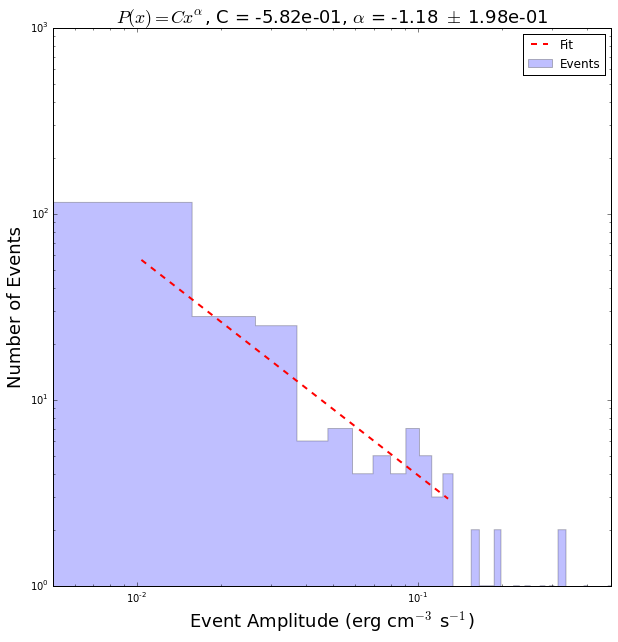

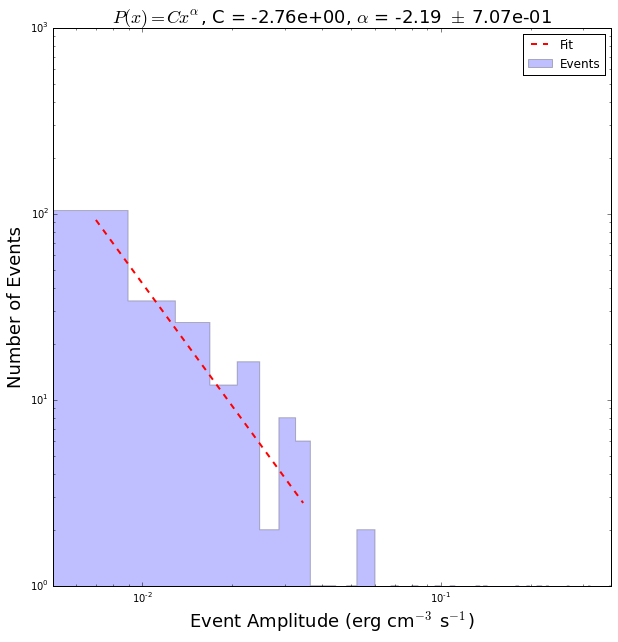

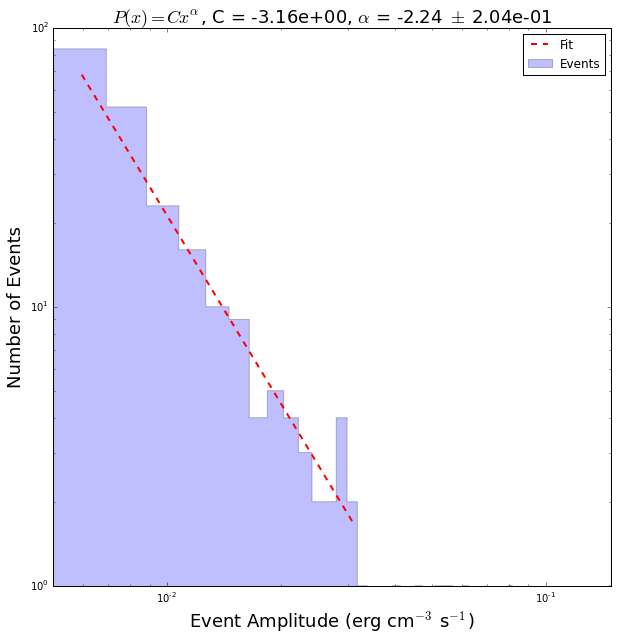

In [60]:
pl_plotter =ebp.Plotter()
for i in range(len(alphas)):
    pl_plotter.events = distributions[i]
    pl_plotter.plot_event_distribution()

We would like to keep $H_n$ constant so that, roughly, we are inputting the same amount of energy into our loop sub-element, even when using a power law distribution. By allowing $\tau$ to be a free parameter, we can see that $H_n$ is not constant and decreases by $\sim2$ with decreasing $\alpha$.

Recall that $N=T_{\mathrm{total}}/(\tau+T_N)$ and $H_nT_{\mathrm{total}}=\sum^N_{i=1}Q_i$ where $Q_i=1/2\tau_iH_i=\tau/2H_i$. Letting $\phi=H_nT_{\mathrm{total}}=\mathrm{const.}$, we can combine all of these expressions as a single equation with one unknown $\tau$, $$\phi=\frac{\tau}{2}\sum_{i=1}^{N(\tau)}H_i(\tau),$$where we note that $H_i$, the $i^{\mathrm{th}}$ event amplitude, is also a function of the pulse width $\tau$.

To determine the correct value of $\tau$, we will need to iterate over a range of $\tau$ values in order to find the one that best suites our required conditions.